# Use Case - Taxi Cancellations

#### Amin Fesharaki

<div class="alert alert-block alert-info">
<strong> 1. </strong> How can a predictive model based on these data be used by Yourcabs.com?. 
</div>

<div class="alert alert-success">
  <b>A.1:</b> Yourcabs.com can use the data to predict whether or not a customer's ride would be canceled which will lead to a reduction in company costs and an increase in revenue. By predicting possible cancellations, Yourcabs.com can implement procedures to reduce or avoid cancellations. In other words, the company could better manage its drivers and reduce costs from sending a taxi to a location that has been canceled by the customer.  In addition, predictive models can help the company not only retain but grow their customer base by providing a higher customer satisfaction (i.e. users will be dissatisfied if there is nothing done about the car cancellation) by improving company operations. Furthermore, there are different ways Yourcabs.com can potentially use predictive modeling. For example, given a pickup location, drop off location, and time of the day, a model can predict how long it will take the driver to travel the distance to the customer or to the destination. Additionally, routing and matching algorithms can also be implemented to direct cars to people in the most efficient way. Overall, there are many uses and benefits that come with predictive modeling, especially for a taxi company like Yourcabs.com. 
</div>

<div class="alert alert-block alert-info">
<strong>2:</strong> How can a profiling model (identifying predictors that distinguish canceled/uncanceled trips) be used by Yourcabs.com?
</div>

<div class="alert alert-success">
  <b>A.2:</b> By generating a good profiling model, Yourcabs.com can gain insight behind ride cancellations. Based on the customer profile, the company can determine whether a ride would be canceled and then establish an appropriate course of action. The company can focus on certain characteristics (and possibly manipulate them through some action (i.e incentive or disincentive) by identifying which predictors contribute to ride cancellations the most (or vice versa). For example, based on key variables in booking data, the company can potentially redirect the customer to an available driver, offer incentives to drivers to not cancel based on customer criteria, and add a confirmation message to both customer and driver. By developing a good profiling model, the company can gain further insight on how to solve the ride cancellation problem.  
</div>

<div class="alert alert-block alert-info">
<strong>3:</strong> Explore, prepare, and transform the data to facilitate predictive modeling.
</div>

_Import Packages_

In [1]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary
from dmba import (
    regressionSummary,
    adjusted_r2_score,
    AIC_score,
    BIC_score,
    classificationSummary,
    gainsChart,
    liftChart,
    stepwise_selection,
)
from fast_ml import eda
from math import sin, cos, sqrt, atan2, radians


%load_ext nb_black
%matplotlib inline

no display found. Using non-interactive Agg backend


<IPython.core.display.Javascript object>

In [2]:
# Load Data
taxi_df = pd.read_csv(
    "/Users/datascience/Desktop/Applied Data Science for Buisiness/Datasets/Taxi-cancellation-case.csv"
)

<IPython.core.display.Javascript object>

**Explore**

In [3]:
# EDA using Fast_ML package
eda.df_info(taxi_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
row#,int64,Numerical,10000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0
user_id,int64,Numerical,7044,"[17712, 17037, 761, 868, 21716, 38966, 22196, ...",0,0
vehicle_model_id,int64,Numerical,20,"[12, 28, 24, 85, 65, 23, 54, 87, 86, 30]",0,0
package_id,float64,Numerical,7,"[nan, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 5.0]",8248,82.48
travel_type_id,int64,Numerical,3,"[2, 3, 1]",0,0
from_area_id,float64,Numerical,522,"[1021.0, 455.0, 814.0, 297.0, 1237.0, 61.0, 40...",15,0.15
to_area_id,float64,Numerical,479,"[1323.0, 1330.0, 393.0, 212.0, 330.0, 1194.0, ...",2091,20.91
from_city_id,float64,Numerical,2,"[nan, 15.0, 1.0]",6294,62.94
to_city_id,float64,Numerical,67,"[nan, 32.0, 160.0, 131.0, 146.0, 29.0, 108.0, ...",9661,96.61
from_date,object,Categorical,7976,"[1/1/13 22:33, 1/1/13 12:43, 1/2/13 0:28, 1/1/...",0,0


<IPython.core.display.Javascript object>

The eda above provides detailed information about the dataset. Key information include data type/group, number of unique values, and the percent missing for each variable. 

**Prepare**

* Row# and user ID is useless for the model and will be removed

In [4]:
# Drop variable
taxi_df.drop(["row#", "user_id"], inplace=True, axis=1)

<IPython.core.display.Javascript object>

* The percent of missing values in the 'from_area_id', 'from_lat', 'from_long' is insignifcant (0.15 percent) and will be removed. 
* Variable 'to_lat' and 'to_long' will be imputed by KNN imputation. 
* Variable 'from_city_id' and 'to_city_id' will be removed since they have 60% and 96% of their values missing. In addition, the area id columns will provide sufficient information to replace those columns.
* Variable 'package_id' will be removed since 82% of the dataset contains missing values and imputing an ID would not make sense. Same goes with 'to_area_id'.
* Variable 'to_date' will be removed since there is a more than likely chance the date is the same as 'from_date'. 
Missing values will be imputed after test/train split to avoid data leakage.

In [5]:
# Drop Variable
taxi_df.drop(
    ["from_city_id", "to_city_id", "package_id", "to_area_id", "to_date"],
    inplace=True,
    axis=1,
)

<IPython.core.display.Javascript object>

* **Regarding the GPS information, the assumption was made that Yourcabs.com shared a similar feature as apps like Uber and Lyft where the destination is known beforehand.** For example, users can set both their pickup and drop off location before ordering a 'taxi'. Therefore, latitude and longitude were used to calculate the distance (in km).
* In addition, a variable "Available_Destination" will also be added for samples where the user did not enter a destination.
* Area Id will also be removed due to the 522 unique Area ID values. Without more information, clustering Area ID's to certain cities or counties (reducing the unique value) is improbable. 
* Package ID is deemed not important to the model and will also be removed
    


In [6]:
# Find approximate distance (in KM) to and from scheduled


R = 6373.0  # approximate radius of earth in km

lat1 = taxi_df["from_lat"].map(radians)
lon1 = taxi_df["from_long"].map(radians)
lat2 = taxi_df["to_lat"].map(radians)
lon2 = taxi_df["to_long"].map(radians)

dist_lon = lon2 - lon1
dist_lat = lat2 - lat1

# Formula to find distance between 2 lat/long points
a = np.sin(dist_lat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dist_lon / 2) ** 2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

distance = pd.DataFrame((R * c), columns=["Distance_km"])  # in KM

## Is Location Available? Another assumption was made that some users did not provide a destination.
## However further investigations showed that this was ineffective for our model.
distance.loc[((distance["Distance_km"] >= 0)), "Available_Destination"] = 0
distance["Available_Destination"] = distance["Available_Destination"].fillna(1)

<IPython.core.display.Javascript object>

In [7]:
taxi_df.drop(
    [
        "from_area_id",
        "from_lat",
        "from_long",
        "to_lat",
        "to_long",
    ],
    inplace=True,
    axis=1,
)

<IPython.core.display.Javascript object>

* Variables will be added for the amount of days and hours from 'booking_created' and 'from_date'. For example, the longer its been, the higher chance of the ride being cancelled.
* Variable 'from_date' will be replaced by its respective month in order to gain insight whether certain months/season contribute to car cancellations.
* Trip day will be added to show if certain days of the week are factors in determining cancellations
* A weekday variable will also be added to determine if weekday or weekend is important to the model's prediction

In [8]:
# Convert to string
string_start = np.array(taxi_df["booking_created"])
string_start = string_start.astype("str")
string_final = np.array(taxi_df["from_date"])
string_final = string_final.astype("str")

# Time when booking was created
date_i = []
time_i = []
for a in string_start:
    date_i.append(a.split()[0])
    time_i.append(a.split()[1])

# Time when customer was picked up by driver
date_f = []
time_f = []
for b in string_final:
    date_f.append(b.split()[0])
    time_f.append(b.split()[1])

# Seperate month/day/year and hours/min into seperate values
date_i_month = []
date_i_day = []
date_i_year = []
time_i_hour = []
time_i_min = []
date_f_month = []
date_f_day = []
date_f_year = []
time_f_hour = []
time_f_min = []

for c in date_i:
    date_i_month.append(c.split("/")[0])
    date_i_day.append(c.split("/")[1])
    date_i_year.append(c.split("/")[2])

for d in time_i:
    time_i_hour.append(d.split(":")[0])
    time_i_min.append(d.split(":")[1])


for e in date_f:
    date_f_month.append(e.split("/")[0])
    date_f_day.append(e.split("/")[1])
    date_f_year.append(e.split("/")[2])

for f in time_f:
    time_f_hour.append(f.split(":")[0])
    time_f_min.append(f.split(":")[1])

# Datetime YY/MM/DD HH:MM
start = []
end = []
Weekday = []
elapsed_seconds = []
for i in range(len(date_i_month)):
    start.append(
        datetime.datetime(
            int(date_i_year[i]),
            int(date_i_month[i]),
            int(date_i_day[i]),
            int(time_i_hour[i]),
            int(time_i_min[i]),
        )
    )
    end.append(
        datetime.datetime(
            int(date_f_year[i]),
            int(date_f_month[i]),
            int(date_f_day[i]),
            int(time_f_hour[i]),
            int(time_f_min[i]),
        )
    )
    # Trip Day
    wd = end[i].weekday()
    Weekday.append(wd)
    elapsed = end[i] - start[i]
    # Seconds between Book Date and Trip Date
    seconds = elapsed.seconds
    elapsed_seconds.append(seconds)

# Calculate the trip day for each trip
day = pd.DataFrame([int(i) for i in Weekday], columns=["Trip_Day"])
elapsed_seconds = pd.DataFrame(
    [int(j) for j in elapsed_seconds], columns=["Elapsed_seconds"]
)
# Calculate whether the trip day was a weekday or weekend?
day.loc[(day["Trip_Day"] >= 4), "Weekday"] = 0
day.loc[(day["Trip_Day"] <= 4), "Weekday"] = 1

# Elapsed minutes between booking and trip day
elapsed_min = elapsed_seconds["Elapsed_seconds"] / 60
elapsed_min = pd.DataFrame(elapsed_min)
elapsed_min = elapsed_min.rename(columns={"Elapsed_seconds": "Elapsed_min"})

# Elapsed hours  between booking and trip day
elapsed_hour = elapsed_min["Elapsed_min"] / 60
elapsed_hour = pd.DataFrame(elapsed_hour)
elapsed_hour = elapsed_min.rename(columns={"Elapsed_min": "Elapsed_hour"})
elapsed_hour = elapsed_hour / 60

# Find season of Trip Date
date_f_month = pd.DataFrame([int(l) for l in date_f_month], columns=["F_Month"])

# Find Season of Cancellation (In Indian Seasons)
date_f_month.loc[
    ((date_f_month["F_Month"] == 1) | (date_f_month["F_Month"] == 12)), "Season"
] = "Winter"

date_f_month.loc[
    ((date_f_month["F_Month"] >= 2) & (date_f_month["F_Month"] <= 3)), "Season"
] = "Spring"

date_f_month.loc[
    ((date_f_month["F_Month"] >= 4) & (date_f_month["F_Month"] <= 6)), "Season"
] = "Summer"

date_f_month.loc[
    ((date_f_month["F_Month"] >= 7) & (date_f_month["F_Month"] <= 8)), "Season"
] = "Monsoon"


date_f_month.loc[
    ((date_f_month["F_Month"] >= 9) & (date_f_month["F_Month"] <= 11)), "Season"
] = "Autumn"

<IPython.core.display.Javascript object>

In [9]:
# Concat Original Data, Time/Date DataFrames, and Distance
pdList = [
    taxi_df,
    date_f_month,
    elapsed_hour,
    distance,
    day,
]
taxi_df = pd.concat(pdList, axis=1)

# Drop Date/Time variables
taxi_df.drop(["from_date", "booking_created"], inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [10]:
# Preview crosstabs for questionable predictors and the target variable (Car Cancellation)
display(pd.crosstab(taxi_df.Car_Cancellation, taxi_df.vehicle_model_id))
display(pd.crosstab(taxi_df.Car_Cancellation, taxi_df.Season))
display(pd.crosstab(taxi_df.Car_Cancellation, taxi_df.F_Month))
display(pd.crosstab(taxi_df.Car_Cancellation, taxi_df.Weekday))
display(pd.crosstab(taxi_df.Car_Cancellation, taxi_df.Trip_Day))

vehicle_model_id,1,10,12,13,17,23,24,28,30,36,54,64,65,70,85,86,87,89,90,91
Car_Cancellation,,,,,,,,,,,,,,,,,,,,
0,1,25,6663,1,7,75,317,384,5,1,16,18,427,1,569,31,110,515,85,6
1,0,0,616,0,0,0,1,22,0,0,0,0,18,0,3,0,6,76,0,1


Season,Autumn,Monsoon,Spring,Summer,Winter
Car_Cancellation,,,,,
0,2479,2302,1260,2509,707
1,380,90,25,239,9


F_Month,1,2,3,4,5,6,7,8,9,10,11,12
Car_Cancellation,,,,,,,,,,,,
0,701,630,630,690,858,961,1074,1228,953,926,600,6
1,9,15,10,35,130,74,39,51,84,163,133,0


Weekday,0.0,1.0
Car_Cancellation,,
0,2814,6443
1,237,506


Trip_Day,0,1,2,3,4,5,6
Car_Cancellation,,,,,,,
0,1262,1201,1251,1262,1467,1508,1306
1,109,74,75,105,143,101,136


<IPython.core.display.Javascript object>

* Cross Tab of vehicle model shows that most cars were id 12 and that most cancellations were from vehicle id 12. Because of this, vehicle id will be removed from the model
* Cross Tab of the seasons indicate that seasons can potentially impact the model’s decision and will remain
* Cross Tab of weekday shows no indications that it should be removed from the model
* Cross Tab of trip day shows a roughly equal distribution of car cancellations for each day of the week. Therefore, this variable is deemed insignificant to the model and will be removed. 


In [11]:
# Drop ineffective variables for the model
taxi_df.drop(
    [
        "Weekday",
        "vehicle_model_id",
        "F_Month",
        "Trip_Day",
    ],
    inplace=True,
    axis=1,
)

<IPython.core.display.Javascript object>

* There are 3 different categories of travel types, 5 different categories of season, 2 categories of ‘available destination’, 2 categories of online booking, and 2 categories for mobile site booking. Therefore these variables will be turned into a categorical variable. 

Category variables with more than 2 types of categories will be turned into dummy variables. These variables include:
* Travel Type ID
* Season


In [12]:
# Convert to categorical data type
taxi_df["travel_type_id"] = taxi_df["travel_type_id"].astype("category")
taxi_df["Season"] = taxi_df["Season"].astype("category")

# Create dummy variables for converted categorical variables
taxi_df = pd.get_dummies(taxi_df, prefix_sep="_")

# Convert rest to categorical data type
taxi_df["Available_Destination"] = taxi_df["Available_Destination"].astype("category")
taxi_df["online_booking"] = taxi_df["online_booking"].astype("category")
taxi_df["mobile_site_booking"] = taxi_df["mobile_site_booking"].astype("category")

<IPython.core.display.Javascript object>

**Transform**

In [13]:
# Separate out predictors and outcome variable
X = taxi_df.drop(columns="Car_Cancellation")
y = taxi_df["Car_Cancellation"]

<IPython.core.display.Javascript object>

In [14]:
# Partition the data into training (80%) and validation (20%) sets with a stratified sampling
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=1
)

<IPython.core.display.Javascript object>

In [15]:
# Handle missing values
imputer = KNNImputer()
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(imputer.transform(X_valid), columns=X_valid.columns)

print(
    "Total number of missing values in the training set:", X_train.isnull().sum().sum()
)
print(
    "Total number of missing values in the validation set:",
    X_valid.isnull().sum().sum(),
)

Total number of missing values in the training set: 0
Total number of missing values in the validation set: 0


<IPython.core.display.Javascript object>

In [16]:
# list for variables to scale (Goal is to avoid scaling binary variables)
cols_to_scale = [
    "Elapsed_hour",
    "Distance_km",
]

# create and fit scaler
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

# scale selected data
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_valid[cols_to_scale] = scaler.transform(X_valid[cols_to_scale])

<IPython.core.display.Javascript object>

In [17]:
# Display Final List of Predictors
X_train.columns

Index(['online_booking', 'mobile_site_booking', 'Elapsed_hour', 'Distance_km',
       'Available_Destination', 'travel_type_id_1', 'travel_type_id_2',
       'travel_type_id_3', 'Season_Autumn', 'Season_Monsoon', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
<strong>4:</strong> Fit several predictive models of your choice. Do they provide information on how the predictor variables relate to cancellations? 
</div>

**K-Neighbors Classifier**

In [18]:
# Fit model
knn = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn.fit(X_train, y_train)
# Predict values
k_pred_t = knn.predict(X_train)
k_pred_v = knn.predict(X_valid)

<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> Feature importance is not defined for the K-Neighbors classifier. KNN does not provide a prediction for the importance or coefficients of variables. In other words, There is no simple or easy way to compute the features responsible for the classification model. Instead, we will use other models to gather more information on the most important features for the model.
 </div>

**Gaussian Naive Bayes Classifier**

In [19]:
# Fit model
nb = GaussianNB()
nb.fit(X_train, y_train)
# Predict values
nb_pred_t = nb.predict(X_train)
nb_pred_v = nb.predict(X_valid)

<IPython.core.display.Javascript object>

In [20]:
# Variable Importance
imps = permutation_importance(nb, X_valid, y_valid, random_state=1, n_repeats=10)
nb_VarImportance = (
    pd.DataFrame(X_train.columns, columns=["Features"]),
    pd.DataFrame(imps.importances_mean, columns=["Importance Mean"]),
    pd.DataFrame(imps.importances_std, columns=["Importance Standard Deviation"])
)
nb_VarImportance = pd.concat(nb_VarImportance, axis=1)
display(nb_VarImportance.sort_values(by='Importance Mean', ascending=False))


,Features,Importance Mean,Importance Standard Deviation
3,Distance_km,0.00615,0.003606
2,Elapsed_hour,0.00135,0.004817
0,online_booking,-0.00250,0.003557
1,mobile_site_booking,-0.00395,0.002687
9,Season_Monsoon,-0.00550,0.003892
10,Season_Spring,-0.00700,0.003354
12,Season_Winter,-0.00700,0.001803
5,travel_type_id_1,-0.00730,0.002713
11,Season_Summer,-0.01645,0.002434
7,travel_type_id_3,-0.02775,0.004976


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> The numbers in the Gaussian Naive Bayes represent the permutation feature importance which measures the importance of a feature by calculating the increase in the model's prediction error after permuting the feature. The features at the top of the table are considered the most important features in the model, while those at the bottom matter least. The negative values indicate that the predictions on noisy/shuffled data are more accurate than the real data. In other words, those features do not contribute as much to the predictions as the positive ones do. In the model fitted above, distance and elapsed time are considered the most important features to the model. The features with negative values on the bottom of the dataframe indicate features that are of little significance to the model.   
</div>

**Gradient Boosting Classifier**

In [21]:
# Fit model
GB = GradientBoostingClassifier(random_state=1)
GB.fit(X_train, y_train)
# Predict values
b_pred_t = GB.predict(X_train)
b_pred_v = GB.predict(X_valid)

<IPython.core.display.Javascript object>

In [22]:
# Variable (feature) importance plot
GB_importances = GB.feature_importances_
GB_df = pd.DataFrame({"feature": X_train.columns, "importance": GB_importances})
GB_df = GB_df.sort_values("importance", ascending=False)
display(GB_df)

,feature,importance
3,Distance_km,0.324998
2,Elapsed_hour,0.290816
0,online_booking,0.160308
8,Season_Autumn,0.110731
1,mobile_site_booking,0.036918
11,Season_Summer,0.034168
4,Available_Destination,0.026190
9,Season_Monsoon,0.005522
12,Season_Winter,0.003811
10,Season_Spring,0.003737


<IPython.core.display.Javascript object>

Text(0, 0.5, '')

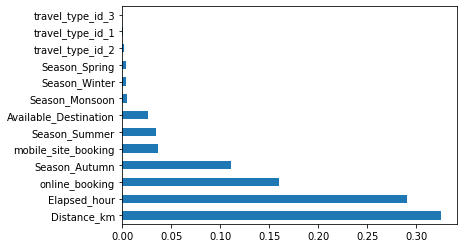

<IPython.core.display.Javascript object>

In [23]:
ax = GB_df.plot(kind="barh", x="feature", legend=False)
ax.set_ylabel("")

<div class="alert alert-warning">
  <strong>*</strong> The feature importance was calculated for the gradient boosting classifier. According to both the table,, we can see that distance and time predictors were the most important features. The plot indicates that online booking and the autumn season also had a considerable impact on the model. In addition, the summer season, mobile site booking, and the destination  availability  had a slight impact on the model as well. However, the gradient boosting classifier model indicated that the travel type feature had almost no contribution to the model’s prediction. 
</div>

**Decision Tree Classifier**

In [24]:
D = DecisionTreeClassifier(random_state=1)
D.fit(X_train, y_train)
D_pred_t = D.predict(X_train)
D_pred_v = D.predict(X_valid)

<IPython.core.display.Javascript object>

In [25]:
# Variable (feature) importance plot
D_importances = D.feature_importances_
D_df = pd.DataFrame({"feature": X_train.columns, "importance": D_importances})
D_df = D_df.sort_values("importance", ascending=False)
display(D_df)

,feature,importance
3,Distance_km,0.443983
2,Elapsed_hour,0.430082
8,Season_Autumn,0.025912
0,online_booking,0.024265
11,Season_Summer,0.015691
9,Season_Monsoon,0.013314
4,Available_Destination,0.011009
7,travel_type_id_3,0.009812
6,travel_type_id_2,0.009561
1,mobile_site_booking,0.007358


<IPython.core.display.Javascript object>

Text(0, 0.5, '')

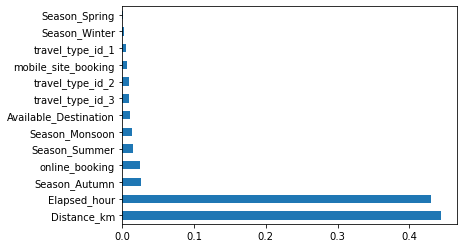

<IPython.core.display.Javascript object>

In [26]:
ax = D_df.plot(kind="barh", x="feature", legend=False)
ax.set_ylabel("")

<div class="alert alert-warning">
  <strong>*</strong> The decision tree model weighed distance and time as the most important features by a significant margin. All other features had little to no impact on the model’s prediction. 
</div>

**Random Forest Classifier**

In [27]:
R = RandomForestClassifier(random_state=1)
R.fit(X_train, y_train)
R_pred_t = R.predict(X_train)
R_pred_v = R.predict(X_valid)

<IPython.core.display.Javascript object>

In [28]:
# Variable (feature) importance plot
importances = R.feature_importances_
std = np.std([R.feature_importances_ for tree in R.estimators_], axis=0)
df = pd.DataFrame({"feature": X_train.columns, "importance": importances, "std": std})
df = df.sort_values("importance", ascending=False)
display(df)

,feature,importance,std
2,Elapsed_hour,0.449418,6.661338e-16
3,Distance_km,0.444487,4.440892e-16
0,online_booking,0.039328,4.857226e-17
8,Season_Autumn,0.021622,6.938894e-18
1,mobile_site_booking,0.010071,8.673617e-18
11,Season_Summer,0.007001,4.336809e-18
10,Season_Spring,0.006194,2.602085e-18
9,Season_Monsoon,0.006072,2.602085e-18
12,Season_Winter,0.003908,1.734723e-18
6,travel_type_id_2,0.003731,4.770490e-18


<IPython.core.display.Javascript object>

Text(0, 0.5, '')

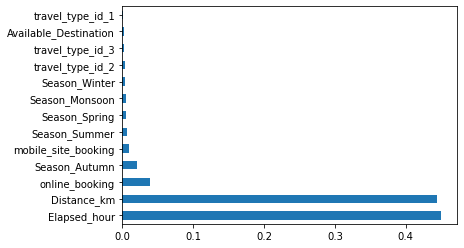

<IPython.core.display.Javascript object>

In [29]:
ax = df.plot(kind="barh", xerr="std", x="feature", legend=False)
ax.set_ylabel("")

<div class="alert alert-warning">
  <strong>*</strong> Similar to the decision tree, the random forest classifier had time and distance had equally (and most impact) on the model. Online booking and the autumn season had a slight importance rating, while everything else had an insignificant impact on the model. 
</div>

**Logistic Regression CV**

In [30]:
# Logistic Regression
logit_full = LogisticRegressionCV(penalty="l1", cv=5, max_iter=1000, solver="saga")
logit_full.fit(X_train, y_train)

# print coefficients
list_full = pd.DataFrame(
    {"Predictor": X_train.columns, "coefficient": logit_full.coef_[0]}
)
print("intercept ", logit_full.intercept_[0])
display(list_full)

# print performance measures
display(regressionSummary(y_train, logit_full.predict(X_train)))

intercept  -4.153662268094669


,Predictor,coefficient
0,online_booking,1.444388
1,mobile_site_booking,1.471632
2,Elapsed_hour,-0.291948
3,Distance_km,-0.643759
4,Available_Destination,-0.397003
5,travel_type_id_1,-0.431076
6,travel_type_id_2,0.047966
7,travel_type_id_3,0.000000
8,Season_Autumn,1.443636
9,Season_Monsoon,0.000000



Regression statistics

               Mean Error (ME) : 0.0727
Root Mean Squared Error (RMSE) : 0.2711
     Mean Absolute Error (MAE) : 0.0735


None

<IPython.core.display.Javascript object>

In order to prevent overfitting, predictor coefficient values less than 0.6 were deemed insignificant to the model and therefore removed in order to compute logistic regression with a reduced set of predictors.

**Reduced Predictors Logistic Regression CV**

In [31]:
# Select Subset based on Logistic Regression CV coefficients
list_full["coefficient"] = list_full["coefficient"].abs()
reduced_list = list_full[list_full["coefficient"] >= 0.6]
predictors = reduced_list["Predictor"].unique()


# Logistic Regression
logit_red = LogisticRegressionCV(penalty="l2", cv=5, max_iter=1000)
logit_red.fit(X_train[predictors], y_train)

# print coefficients
list_red = pd.DataFrame(
    {"Predictor": X_train[predictors].columns, "coefficient": logit_red.coef_[0]}
)
print("intercept ", logit_red.intercept_[0])
display(list_red)

# print performance measures
display(regressionSummary(y_train, logit_red.predict(X_train[predictors])))

logit_red_pred = logit_red.predict_proba(X_train[predictors])
red_result = pd.DataFrame(
    {
        "actual": y_train,
        "p(0)": [p[0] for p in logit_red_pred],
        "p(1)": [p[1] for p in logit_red_pred],
        "predicted": logit_red.predict(X_train[predictors]),
    }
)
red_result = red_result.sort_values(by=["p(1)"], ascending=False)

intercept  -2.5331267951170258


,Predictor,coefficient
0,online_booking,0.015311
1,mobile_site_booking,0.002535
2,Distance_km,-0.024719
3,Season_Autumn,0.013812
4,Season_Summer,0.001883
5,Season_Winter,-0.003694



Regression statistics

               Mean Error (ME) : 0.0742
Root Mean Squared Error (RMSE) : 0.2725
     Mean Absolute Error (MAE) : 0.0742


None

<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> The predictors above are the features that were considered important enough to use in the reduced logistic regression model. Furthermore, distance, the autumn season, and online booking had the most impact for the reduced predictor  model. However, it is interesting to note that the time variable ‘elapsed_hour’ was not considered relative to the model, while all other models had time as one of the most important predictors. 
</div>

_Further investigation of the two most important predictors (Distance and Time)

In [32]:
# Copy Df
df = taxi_df.copy()

<IPython.core.display.Javascript object>

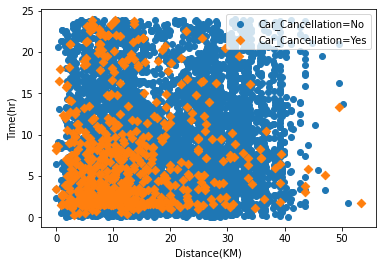

<IPython.core.display.Javascript object>

In [33]:
# plot Distance vs. Time
fig, ax = plt.subplots()

subset = df.loc[df["Car_Cancellation"] == 0]
ax.scatter(
    subset.Distance_km, subset.Elapsed_hour, marker="o", label="Car_Cancellation=No"
)

subset1 = df.loc[df["Car_Cancellation"] == 1]
ax.scatter(
    subset1.Distance_km, subset1.Elapsed_hour, marker="D", label="Car_Cancellation=Yes"
)

plt.xlabel("Distance(KM)")  # set x-axis label
plt.ylabel("Time(hr)")  # set y-axis label

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

From the scatterplot, we can see that there shorter distance trips and time in between booking and trip date leads to more cancellations.

<div class="alert alert-success">
  <b>A.4:</b> Overall, the models above provided insight to what kind of features are important to cancellations. Almost all models indicated that distance and time predictors are heavily related to car cancellations. Predictors like online booking, mobile booking, and season influenced the model’s predictions, but are considered relatively insignificant to the distance and time predictors. 
</div>

<div class="alert alert-block alert-info">
<strong>5:</strong> Report the predictive performance of your model in terms of error rates (the confusion matrix). How well does the model perform? Can the model be used in practice?
</div>

In [34]:
# confusion matrix
print("- Full Logistic Regression - Training Confustion Matrix -")
classificationSummary(y_train, logit_full.predict(X_train))
print("- Full Logistic Regression - Validation Set Confustion Matrix -")
classificationSummary(y_valid, logit_full.predict(X_valid))

- Full Logistic Regression - Training Confustion Matrix -
Confusion Matrix (Accuracy 0.9265)

       Prediction
Actual    0    1
     0 7403    3
     1  585    9
- Full Logistic Regression - Validation Set Confustion Matrix -
Confusion Matrix (Accuracy 0.9265)

       Prediction
Actual    0    1
     0 1850    1
     1  146    3


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> Logistic regression with the full set of predictors yielded the same accuracy of 92.65% for both the training and validation set. However, the model classifies almost all of the predictions as ‘no cancellations’. Because of this, the accuracy is high since there are vastly more no cancellations than cancellations. Therefore in terms of trying to predict cancellations, this model should not be used in practice. 
</div>

In [35]:
# confusion matrix
print("- Reduced Logistic Regression - Training Set Confustion Matrix -")
classificationSummary(y_train, logit_red.predict(X_train[predictors]))
print("- Reduced Logistic Regression -  Validation Set Confustion Matrix -")
classificationSummary(y_valid, logit_red.predict(X_valid[predictors]))

- Reduced Logistic Regression - Training Set Confustion Matrix -
Confusion Matrix (Accuracy 0.9257)

       Prediction
Actual    0    1
     0 7406    0
     1  594    0
- Reduced Logistic Regression -  Validation Set Confustion Matrix -
Confusion Matrix (Accuracy 0.9255)

       Prediction
Actual    0    1
     0 1851    0
     1  149    0


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> Logistic regression with the reduced set of predictors yielded an accuracy of 92.55% for the validation set. Similar to the full predictor model, this model classifies all of the predictions as ‘no cancellations’. In terms of trying to predict cancellations, this model should not be used in practice. 
</div>

In [36]:
print("- KNeighbors - Training Set Confusion matrix\n")
classificationSummary(y_train, k_pred_t)
print("\n- KNeighbors - Validation Set Confusion matrix\n")
classificationSummary(y_valid, k_pred_v)

- KNeighbors - Training Set Confusion matrix

Confusion Matrix (Accuracy 0.9970)

       Prediction
Actual    0    1
     0 7394   12
     1   12  582

- KNeighbors - Validation Set Confusion matrix

Confusion Matrix (Accuracy 0.8770)

       Prediction
Actual    0    1
     0 1722  129
     1  117   32


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong>  K-Neighbor classifier had a training accuracy of 99.7% which indicates that the model may be overfitted. The validation set had an accuracy of 87.70% which is slightly lower than the logistic regression model. However, the model appears to correctly classify cancellations which is an improvement to the logistic regression models. When comparing the two models, the K-Neighbors classifier works better than the logistic regression model, but still is not sufficient enough to be used in practice. 
</div>

In [37]:
print("- Gradient Booster - Training Set Confusion matrix\n")
classificationSummary(y_train, b_pred_t)
print("\n- Gradient Booster - Validation Set Confusion matrix\n")
classificationSummary(y_valid, b_pred_v)

- Gradient Booster - Training Set Confusion matrix

Confusion Matrix (Accuracy 0.9307)

       Prediction
Actual    0    1
     0 7378   28
     1  526   68

- Gradient Booster - Validation Set Confusion matrix

Confusion Matrix (Accuracy 0.9225)

       Prediction
Actual    0    1
     0 1833   18
     1  137   12


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> The gradient boosting classifier yielded similar accuracies in both training and validation set at roughly 92.5%. The model performs better than the logistic regression, but slightly worse in classifying cancellations than the K-Neighbors classifier. Therefore, the gradient boosting classifier should not be used in practice. 
</div>

In [38]:
print("- Random Forest - Training Set Confusion matrix\n")
classificationSummary(y_train, R_pred_t)
print("\n- Random Forest - Validation Set Confusion matrix\n")
classificationSummary(y_valid, R_pred_v)

- Random Forest - Training Set Confusion matrix

Confusion Matrix (Accuracy 0.9972)

       Prediction
Actual    0    1
     0 7401    5
     1   17  577

- Random Forest - Validation Set Confusion matrix

Confusion Matrix (Accuracy 0.9095)

       Prediction
Actual    0    1
     0 1797   54
     1  127   22


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> The random forest accuracy for the training set is 99.72% which indicates the model is possibly overfitting. Furthermore, the validation set yielded an accuracy of 90.95%. All attempts of hypertuning the model led to a decrease in accuracy when classifying cancellations.  Moreover, the model performs similarly to the K-Neighbors classifier. For these reasonings, the random forest model is not practical for implementation. 
</div>

In [39]:
print("- Decision Tree - Training Set Confusion matrix\n")
classificationSummary(y_train, D_pred_t)
print("\n- Decision Tree - Validation Set Confusion matrix\n")
classificationSummary(y_valid, D_pred_v)

- Decision Tree - Training Set Confusion matrix

Confusion Matrix (Accuracy 0.9972)

       Prediction
Actual    0    1
     0 7403    3
     1   19  575

- Decision Tree - Validation Set Confusion matrix

Confusion Matrix (Accuracy 0.8835)

       Prediction
Actual    0    1
     0 1731  120
     1  113   36


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> Similar to random forest, the decision tree accuracy for the training set is 99.72% which indicates the model is possibly overfitting. The decision tree model outperforms all the models previously discussed in the validation set. Attempts to hypertuned the model yielded worse results for the decision tree model. However, the decision tree model still classifies most cancellations as non cancellations, making this model ineffective in practice. 
</div>

In [40]:
print("- Gaussian Naive Bayes - Training Set Confusion matrix\n")
classificationSummary(y_train, nb_pred_t)
print("\n- Gaussian Naive Bayes - Validation Set Confusion matrix\n")
classificationSummary(y_valid, nb_pred_v)

- Gaussian Naive Bayes - Training Set Confusion matrix

Confusion Matrix (Accuracy 0.7205)

       Prediction
Actual    0    1
     0 5369 2037
     1  199  395

- Gaussian Naive Bayes - Validation Set Confusion matrix

Confusion Matrix (Accuracy 0.7100)

       Prediction
Actual    0    1
     0 1320  531
     1   49  100


<IPython.core.display.Javascript object>

<div class="alert alert-warning">
  <strong>*</strong> The Gaussian Naive Bayes model has an accuracy of 72% and 71% for the training and validation set respectively. An accuracy that low indicates that the model is not overfitting but still better than classifying than a random model. However, the Gaussian Naive Bayes classifies the most cancellations accurately (much more than the other models), and is even able to classify more cancellations correctly than incorrectly. Therefore, this model is acceptable enough to be used in practice for the taxi cancellation dataset. 
</div>

<div class="alert alert-success">
  <b>A.5:</b> Compared to every model, the Gaussian Naive Bayes model had the lowest accuracy score for both the training and validation set. However, the reasoning why the Gaussian Naive Bayes model is considered the best model for this dataset is due to the fact the model correctly identifies cancellations at a significantly higher rate than the other models used. In addition, incorrectly classifying no cancellations should be considered less important to the company than incorrectly classifying customers that classifies. Therefore, the  Gaussian Naive Bayes model is sufficient enough to be used in practice by Yourcabs.com. 
</div>

<div class="alert alert-block alert-info">
<strong>6:</strong> Examine the predictive performance of your model in terms of ranking (lift). How well does the model perform? Can the model be used in practice?
</div>

The Gaussian Naive Bayes model was the only model that was practical to use by Yourcabs.com. Therefore, the gain and lift analysis will solely be done for the Gaussian Naive Bayes model.

**Gaussian Naive Bayes Classifier**

<AxesSubplot:xlabel='Percentile', ylabel='Lift'>

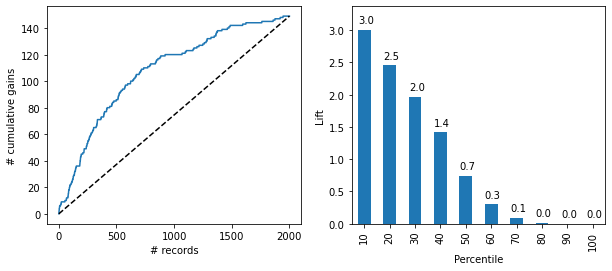

<IPython.core.display.Javascript object>

In [41]:
# predicted probabilities for validation set
nb_pred_prob_v = nb.predict_proba(X_valid)

# put it together in a data frame
NB_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in nb_pred_prob_v],
        "p(1)": [p[1] for p in nb_pred_prob_v],
        "predicted": nb_pred_v,
    }
)

# lift chart for validation set
NB = NB_result.sort_values(by=["p(1)"], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(NB.actual, ax=axes[0])
liftChart(NB["p(1)"], title=False, ax=axes[1])

<div class="alert alert-success">
  <b>A.6:</b> Both charts indicate that the model can in fact be used in practice. From the gains chart, it can be seen that the model’s predictive performance in terms of gains is better than the baseline model, since its cumulative gains curve is higher than that of the baseline model. Moreover, the lift chart shows that the model’s predictive performance is better than the baseline model, since its lift curve is higher than that of the baseline model. For example, from the decile chart, we can see that choosing the top 10% of the sample will have a gain 3.0 times the amount than choosing 10% at random. Other deciles and their ratios can be noted on the lift chart. The staircase effect of the model also indicates that the model ‘binned’ the sample from the most likely to least likely for cancellations. 
</div>

<div class="alert alert-block alert-info">
<strong>7:</strong> Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. 
</div>

Yourcabs is a company that offers a booking service for taxis in India. However, the company was facing a problem with drivers using their platform where many drivers were not showing up for the scheduled calls. In other words, drivers would cancel their bookings, and if the cancellation did not occur with adequate notice, the customer would be left with no ride or an alternate driver. Therefore, a predictive model will be implemented to predict cancellations and give further insight to why cancellations happen. By accurately predicting the cancellations, the company will be able to reduce company costs and ultimately increase revenue as well as customer satisfaction. 

Yourcabs.com had collected data on its bookings from 2011 to 2013 which resulted in 10,000 samples to implement a model. The original dataset included 17 input variables. However, the variables were either combined into a new feature or disregarded if deemed unnecessary to the model.  In addition, the dataset was explored, cleaned, and transformed appropriately for modeling. Afterwards, classification models were used to categorize cancellations and non cancellations. The models used are as follows: K-Neighbors, Gaussian Naive Bayes, Gradient Boosting, Decision Tree, Random Forest, and Logistic Regression. Among those models, only the Gaussian Naives Bayes was considered sufficient enough for practical use. The Naives Bayes classifier had an accuracy rating of 71%, but was able to classify the cancellations 67% of the time which was significantly higher than any other model used.

Feature importance was also explored to determine which characteristics influenced cancellations the most.  The key underlying assumption made about the taxi company was that Yourcabs.com shared a similar feature as apps like Uber and Lyft where the destination is known beforehand. For example, users can set both their pickup and drop off location before ordering a 'taxi'.  Therefore, a distance variable was implemented. Almost all models incorporated into the analysis shared the same characteristic where distance and time had the most impact on the models prediction. Further analysis showed that the shorter the trip and time in between bookings lead to more cancellations. Other variables that also contributed to the models success were the season of the trip date and if the booking was made through online or mobile booking.  Recommendations include flagging all orders that are predicted to cancel using the model. By doing so, the company can potentially prevent cancellations from happening by implementing a feature such as a confirmation message (and/or phone call) to all flagged orders to both parties (drivers and customers) that they still can commit to the order. Once both parties have confirmed, the cab will be dispatched to the customer, and if not, an alternative driver can be notified ahead of time to pick up the customer. Orders that are flagged as canceled but in reality are not canceled will also not be affected by the confirmation message recommendation as long as the service states that users are expected to answer confirmation messages in a timely manner. 